In [7]:
import sys , os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import Modelling as mo

In [3]:


# Initialize the Modeling class
modeling = mo.Modeling()

# Load the data
path = '../data/proceced_data.csv'  
data = modeling.load_data(path)

data.head()



,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,...,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE,Recency,RFMS_score,Label
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,...,15,11,2018,0.0,3.137005,1.645067,1.620379,2264,-0.042337,1
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2264,-0.042337,1
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,...,15,11,2018,0.0,3.137005,inf,1.620379,2264,-0.083785,0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,...,15,11,2018,0.0,-1.618899,-0.271621,-1.134962,2264,-0.068359,0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2264,-0.068359,0


In [4]:
%load_ext autoreload
%autoreload 2

import importlib
import Modelling

# Reload the updated module to ensure any changes are loaded
importlib.reload(Modelling)


<module 'Modelling' from 'c:\\Users\\HP\\Documents\\Dagii\\Credit-scoring-model\\scripts\\Modelling.py'>

first load the data

In [5]:
# Preprocess the data
data = modeling.preprocess_data(data)



In [8]:
if data is not None:
    # Replace infinite values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Replace NaN values with the mean of the respective column
    data.fillna(data.mean(), inplace=True)

    # Verify there are no more infinite or very large values
    infinite_values_post = data.isin([np.inf, -np.inf]).sum()
    large_values_post = (data.abs() > np.finfo(np.float64).max).sum()

    print(f"Infinite values after cleaning: {infinite_values_post.sum()}")
    print(f"Very large values after cleaning: {large_values_post.sum()}")
else:
    print("Failed to handle infinite or very large values as preprocessing step failed")


Infinite values after cleaning: 0
Very large values after cleaning: 0


###Define Features and Target

###Initialize the Modeling Class and Split Data

In [9]:
X_train, X_test, y_train, y_test = modeling.split_the_data(data)

In [10]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 76529 samples
Testing set size: 19133 samples


In [10]:
import numpy as np

# Identify infinite or very large values in the test dataset
infinite_values_test = X_test.isin([np.inf, -np.inf]).sum()
large_values_test = (X_test.abs() > np.finfo(np.float64).max).sum()

print(f"Infinite values in test data: {infinite_values_test.sum()}")
print(f"Very large values in test data: {large_values_test.sum()}")

# Replace infinite values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the mean of the respective column
X_test.fillna(X_test.mean(), inplace=True)

# Verify there are no more infinite or very large values in the test data
infinite_values_test_post = X_test.isin([np.inf, -np.inf]).sum()
large_values_test_post = (X_test.abs() > np.finfo(np.float64).max).sum()

print(f"Infinite values after cleaning in test data: {infinite_values_test_post.sum()}")
print(f"Very large values after cleaning in test data: {large_values_test_post.sum()}")


Infinite values in test data: 0
Very large values in test data: 0
Infinite values after cleaning in test data: 0
Very large values after cleaning in test data: 0


## Why Choose Logistic Regression and Random Forest

### Logistic Regression
- **Simplicity and Interpretability**: Logistic Regression is straightforward and easy to interpret, making it an excellent choice for understanding the relationship between features and the target variable.
- **Efficiency**: It is computationally efficient, which is beneficial for large datasets.
- **Binary Classification**: Well-suited for binary classification tasks, providing probabilistic outputs that can be easily understood and interpreted.

### Random Forest
- **Robustness**: Combines multiple decision trees to reduce overfitting and improve generalization to unseen data.
- **Feature Importance**: Capable of evaluating the importance of each feature, providing insights into which features are most influential in making predictions.
- **Versatility**: Handles both classification and regression tasks effectively, making it a versatile choice for various problems.

### Combined Benefits
By using both Logistic Regression and Random Forest, you balance simplicity and interpretability with robustness and predictive performance. This combination allows you to compare and contrast different modeling techniques to find the best solution for your data.

## Summary
- **Logistic Regression**: Simple, interpretable, efficient for binary classification.
- **Random Forest**: Robust, reduces overfitting, evaluates feature importance.

This balanced approach provides a comprehensive understanding of your data and helps in making well-informed decisions based on the strengths of both models.


In [11]:
# Train the models
logistic_model, random_forest_model = modeling.train_the_models(X_train, y_train)


In [12]:
logistic_model

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
random_forest_model

RandomForestClassifier(random_state=42)

In [14]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
y_pred_logistic = modeling.evaluate_models(logistic_model, X_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
y_pred_rf = modeling.evaluate_models(random_forest_model, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5000

Random Forest Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000


c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
y_pred_logistic = modeling.evaluate_models(logistic_model, X_test, y_test)

Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5000


c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [20]:
# Ensure consistent feature names
feature_names = X_train.columns

# Evaluate Logistic Regression with consistent feature names
print("Logistic Regression Evaluation:")
y_pred_logistic = modeling.evaluate_models(logistic_model, X_test[feature_names], y_test)


Logistic Regression Evaluation:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5000


c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [17]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores_lr = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)

print("Random Forest CV Accuracy: ", scores_rf.mean())
print("Logistic Regression CV Accuracy: ", scores_lr.mean())

Random Forest CV Accuracy:  1.0
Logistic Regression CV Accuracy:  0.995112959270221


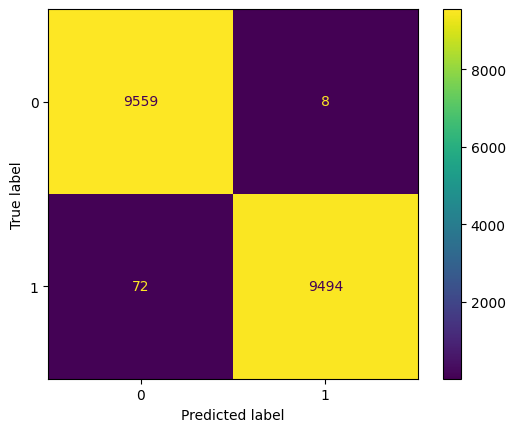

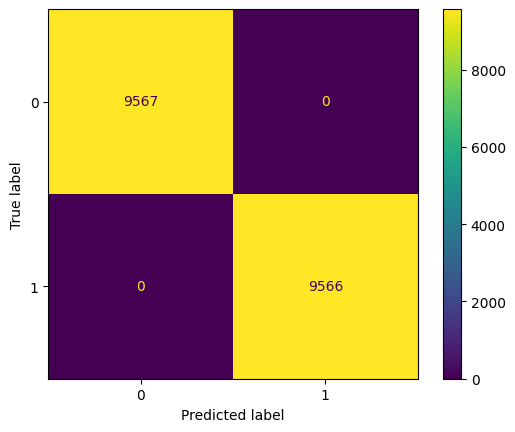

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logistic_model.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_test, random_forest_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

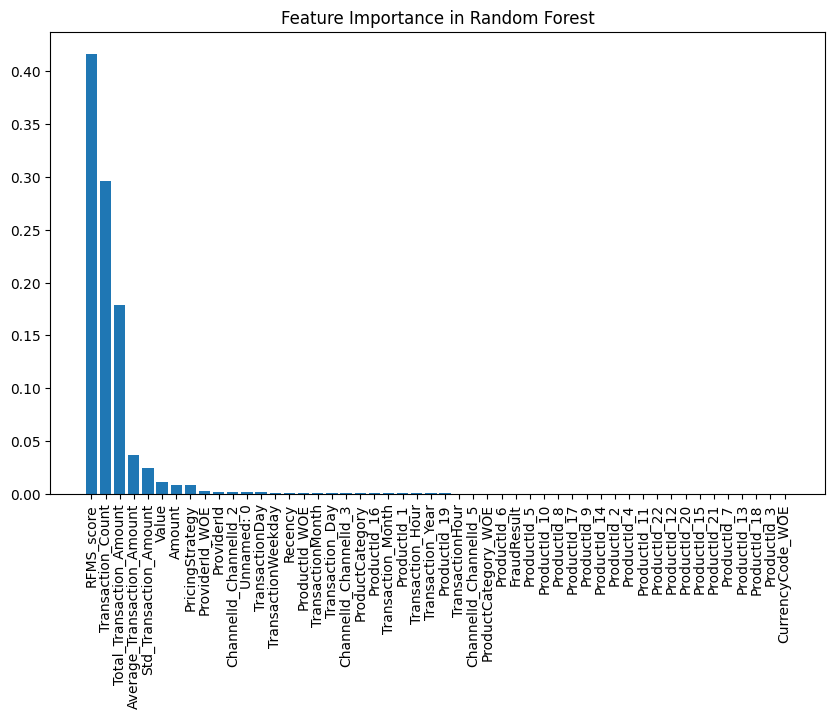

In [19]:
import matplotlib.pyplot as plt
import numpy as np

importance = random_forest_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()